In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Prepare the Data

In [2]:
# Load data
file = Path('myopia.csv')

In [3]:
# Prepare data
myopia_df = pd.read_csv(file, index_col=0)
myopia_df = myopia_df.drop('MYOPIC', axis=1)
myopia_df.head(10)

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
AGE,,,,,,,,,,,,,
6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0


In [4]:
x = pd.get_dummies(data=myopia_df)
print(x.shape)
x.head()

(618, 13)


,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
AGE,,,,,,,,,,,,,
6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Standardize Data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_scaled[0]

array([-1.3639169 , -0.89286146,  0.48378402, -0.28144315, -1.0197916 ,
        4.1506609 ,  1.69744958, -0.68931054, -0.67299591,  0.18405806,
        0.49830393,  0.98713773,  1.0032415 ])

In [7]:
# Number of rows and columns
x_scaled.shape

(618, 13)

# Apply Dimentionality Reduction

In [8]:
# Reduce dataset dimensions with 99% of the data
pca = PCA(n_components=0.99)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(618, 11)

In [9]:
pca.explained_variance_.sum()

13.021054200316064

In [10]:
# Reduce dimensions with PCA
pca = PCA(n_components=0.90)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(618, 10)

In [11]:
pca.explained_variance_.sum()

12.42207992143584

In [12]:
# Reduce t-SNE output
tsne1 = TSNE(perplexity=50)
tsne1Features = tsne1.fit_transform(prin_components)
tsne1Features.shape

(618, 2)

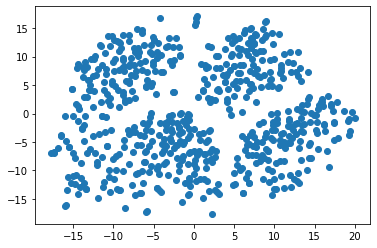

In [13]:
x = tsne1Features[:,0]
y = tsne1Features[:,1]

plt.scatter(x,y)
plt.show()

# Perform Cluster Analysis with K-Means

In [14]:
# Identify clusters with k-means
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters = value, random_state=0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)

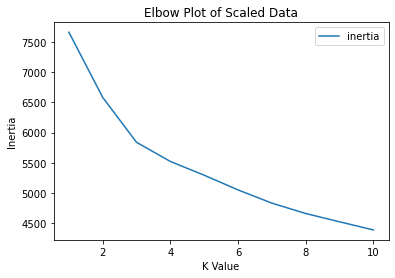

In [15]:
# Create elbow plot
elbowPlot = pd.DataFrame({'K': k, "inertia": inertia})
elbowPlot.plot.line(x='K', y="inertia")
plt.ylabel("Inertia")
plt.xlabel("K Value")
plt.title("Elbow Plot of Scaled Data")
plt.show()

# Make a Recommendation
Based on our findings, we can conclude that the patients could be clustered together. The point in which our elbow plot bends is at about 3. This can also be seen in the scatterplot.